# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [17]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import time
import os
import openweathermapy.core as owm
import datetime as dt

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [33]:
# # List for holding lat_lngs and cities
# lat_lngs = []
# cities = []

# # Create a set of random lat and lng combinations
# lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
# lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
# lat_lngs = zip(lats, lngs)

# # Identify nearest city for each lat, lng combination
# for lat_lng in lat_lngs:
#     city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
#     # If the city is unique, then add it to a our cities list
#     if city not in cities:
#         cities.append(city)

# # Print the city count to confirm sufficient count
# len(cities)
# #lats
#-------------------------------------------------------------------------

# Generating "AT LEAST" 500 random cities (enter more than 1300 cities to factor in same city in the list)

no_of_cities = 1500

# -- using list comprehension

coordinates = [((np.random.uniform(-90.000, 90.000)),(np.random.uniform(-180.000, 180.000))) for x in range (no_of_cities)]

len(coordinates)

1500

In [34]:
# Populating cities list with nearest city of (lat,long) value - (Class 2 -> Activity 13)

cities = []
city_list = []
for coordinate_pair in coordinates:
    lat, lon = coordinate_pair
    cities.append(citipy.nearest_city(lat, lon))
    city_names = citipy.nearest_city(lat, lon).city_name
    
    if city_names not in city_list:
        city_list.append(city_names)
    

len(city_list)

611

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [12]:
# # Save config information.
# url = "http://api.openweathermap.org/data/2.5/weather?"
# units = "metric"

# # Build partial query URL
# query_url = f"{url}appid={api_key}&units={units}&q="

# response = requests.get(query_url + "Beijing").json()

# #response
# #print(json.dumps(response, indent=5, sort_keys=True))


In [35]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

# defining variable to hold relative values after API call
city_name = []
cloudiness = []
country = []
date = []
humidity = []
latitude = []
longitude = []
max_temp = []
wind_speed = []

counter = 1

# log data 

print("Beginning Data Retrieval")
print("--------------------------------")
    
for city in city_list:
    
    try:
        print("Processing Record " + str(counter) + " of " + city)
        print(query_url + city)
        response = requests.get(query_url + city).json()
        

        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        latitude.append(response["coord"]["lat"])
        longitude.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        wind_speed.append(response["wind"]["speed"])

        counter = counter + 1 
    
    except (KeyError, ValueError):
        print("City not found. skipping...")
        
        

Beginning Data Retrieval
--------------------------------
Processing Record 1 of edea
http://api.openweathermap.org/data/2.5/weather?appid=88c9d9804ebaf57ac59df6ab6f725dd4&units=metric&q=edea
Processing Record 2 of pacific grove
http://api.openweathermap.org/data/2.5/weather?appid=88c9d9804ebaf57ac59df6ab6f725dd4&units=metric&q=pacific grove
Processing Record 3 of sao joao da barra
http://api.openweathermap.org/data/2.5/weather?appid=88c9d9804ebaf57ac59df6ab6f725dd4&units=metric&q=sao joao da barra
Processing Record 4 of tabiauea
http://api.openweathermap.org/data/2.5/weather?appid=88c9d9804ebaf57ac59df6ab6f725dd4&units=metric&q=tabiauea
City not found. skipping...
Processing Record 4 of longyearbyen
http://api.openweathermap.org/data/2.5/weather?appid=88c9d9804ebaf57ac59df6ab6f725dd4&units=metric&q=longyearbyen
Processing Record 5 of bengkulu
http://api.openweathermap.org/data/2.5/weather?appid=88c9d9804ebaf57ac59df6ab6f725dd4&units=metric&q=bengkulu
City not found. skipping...
Proces

Processing Record 50 of bluff
http://api.openweathermap.org/data/2.5/weather?appid=88c9d9804ebaf57ac59df6ab6f725dd4&units=metric&q=bluff
Processing Record 51 of krompachy
http://api.openweathermap.org/data/2.5/weather?appid=88c9d9804ebaf57ac59df6ab6f725dd4&units=metric&q=krompachy
Processing Record 52 of albany
http://api.openweathermap.org/data/2.5/weather?appid=88c9d9804ebaf57ac59df6ab6f725dd4&units=metric&q=albany
Processing Record 53 of bilibino
http://api.openweathermap.org/data/2.5/weather?appid=88c9d9804ebaf57ac59df6ab6f725dd4&units=metric&q=bilibino
Processing Record 54 of dingle
http://api.openweathermap.org/data/2.5/weather?appid=88c9d9804ebaf57ac59df6ab6f725dd4&units=metric&q=dingle
Processing Record 55 of dicabisagan
http://api.openweathermap.org/data/2.5/weather?appid=88c9d9804ebaf57ac59df6ab6f725dd4&units=metric&q=dicabisagan
Processing Record 56 of oksfjord
http://api.openweathermap.org/data/2.5/weather?appid=88c9d9804ebaf57ac59df6ab6f725dd4&units=metric&q=oksfjord
Proce

Processing Record 100 of los llanos de aridane
http://api.openweathermap.org/data/2.5/weather?appid=88c9d9804ebaf57ac59df6ab6f725dd4&units=metric&q=los llanos de aridane
Processing Record 101 of tabou
http://api.openweathermap.org/data/2.5/weather?appid=88c9d9804ebaf57ac59df6ab6f725dd4&units=metric&q=tabou
Processing Record 102 of upernavik
http://api.openweathermap.org/data/2.5/weather?appid=88c9d9804ebaf57ac59df6ab6f725dd4&units=metric&q=upernavik
Processing Record 103 of samarai
http://api.openweathermap.org/data/2.5/weather?appid=88c9d9804ebaf57ac59df6ab6f725dd4&units=metric&q=samarai
Processing Record 104 of sorong
http://api.openweathermap.org/data/2.5/weather?appid=88c9d9804ebaf57ac59df6ab6f725dd4&units=metric&q=sorong
Processing Record 105 of srednekolymsk
http://api.openweathermap.org/data/2.5/weather?appid=88c9d9804ebaf57ac59df6ab6f725dd4&units=metric&q=srednekolymsk
Processing Record 106 of banda aceh
http://api.openweathermap.org/data/2.5/weather?appid=88c9d9804ebaf57ac59df

Processing Record 150 of temaraia
http://api.openweathermap.org/data/2.5/weather?appid=88c9d9804ebaf57ac59df6ab6f725dd4&units=metric&q=temaraia
City not found. skipping...
Processing Record 150 of sao filipe
http://api.openweathermap.org/data/2.5/weather?appid=88c9d9804ebaf57ac59df6ab6f725dd4&units=metric&q=sao filipe
Processing Record 151 of altamira
http://api.openweathermap.org/data/2.5/weather?appid=88c9d9804ebaf57ac59df6ab6f725dd4&units=metric&q=altamira
Processing Record 152 of kanniyakumari
http://api.openweathermap.org/data/2.5/weather?appid=88c9d9804ebaf57ac59df6ab6f725dd4&units=metric&q=kanniyakumari
Processing Record 153 of vila velha
http://api.openweathermap.org/data/2.5/weather?appid=88c9d9804ebaf57ac59df6ab6f725dd4&units=metric&q=vila velha
Processing Record 154 of avarua
http://api.openweathermap.org/data/2.5/weather?appid=88c9d9804ebaf57ac59df6ab6f725dd4&units=metric&q=avarua
Processing Record 155 of petropavlovsk-kamchatskiy
http://api.openweathermap.org/data/2.5/weat

Processing Record 198 of ruteng
http://api.openweathermap.org/data/2.5/weather?appid=88c9d9804ebaf57ac59df6ab6f725dd4&units=metric&q=ruteng
Processing Record 199 of vila vicosa
http://api.openweathermap.org/data/2.5/weather?appid=88c9d9804ebaf57ac59df6ab6f725dd4&units=metric&q=vila vicosa
Processing Record 200 of sinnamary
http://api.openweathermap.org/data/2.5/weather?appid=88c9d9804ebaf57ac59df6ab6f725dd4&units=metric&q=sinnamary
Processing Record 201 of tucupita
http://api.openweathermap.org/data/2.5/weather?appid=88c9d9804ebaf57ac59df6ab6f725dd4&units=metric&q=tucupita
Processing Record 202 of chara
http://api.openweathermap.org/data/2.5/weather?appid=88c9d9804ebaf57ac59df6ab6f725dd4&units=metric&q=chara
Processing Record 203 of bandarbeyla
http://api.openweathermap.org/data/2.5/weather?appid=88c9d9804ebaf57ac59df6ab6f725dd4&units=metric&q=bandarbeyla
Processing Record 204 of college
http://api.openweathermap.org/data/2.5/weather?appid=88c9d9804ebaf57ac59df6ab6f725dd4&units=metric&

Processing Record 245 of kangaatsiaq
http://api.openweathermap.org/data/2.5/weather?appid=88c9d9804ebaf57ac59df6ab6f725dd4&units=metric&q=kangaatsiaq
Processing Record 246 of torbay
http://api.openweathermap.org/data/2.5/weather?appid=88c9d9804ebaf57ac59df6ab6f725dd4&units=metric&q=torbay
Processing Record 247 of camacha
http://api.openweathermap.org/data/2.5/weather?appid=88c9d9804ebaf57ac59df6ab6f725dd4&units=metric&q=camacha
Processing Record 248 of villa bruzual
http://api.openweathermap.org/data/2.5/weather?appid=88c9d9804ebaf57ac59df6ab6f725dd4&units=metric&q=villa bruzual
Processing Record 249 of grand river south east
http://api.openweathermap.org/data/2.5/weather?appid=88c9d9804ebaf57ac59df6ab6f725dd4&units=metric&q=grand river south east
City not found. skipping...
Processing Record 249 of itarema
http://api.openweathermap.org/data/2.5/weather?appid=88c9d9804ebaf57ac59df6ab6f725dd4&units=metric&q=itarema
Processing Record 250 of lebu
http://api.openweathermap.org/data/2.5/wea

Processing Record 293 of kuching
http://api.openweathermap.org/data/2.5/weather?appid=88c9d9804ebaf57ac59df6ab6f725dd4&units=metric&q=kuching
Processing Record 294 of lorengau
http://api.openweathermap.org/data/2.5/weather?appid=88c9d9804ebaf57ac59df6ab6f725dd4&units=metric&q=lorengau
Processing Record 295 of darnah
http://api.openweathermap.org/data/2.5/weather?appid=88c9d9804ebaf57ac59df6ab6f725dd4&units=metric&q=darnah
Processing Record 296 of faya
http://api.openweathermap.org/data/2.5/weather?appid=88c9d9804ebaf57ac59df6ab6f725dd4&units=metric&q=faya
Processing Record 297 of raurkela
http://api.openweathermap.org/data/2.5/weather?appid=88c9d9804ebaf57ac59df6ab6f725dd4&units=metric&q=raurkela
City not found. skipping...
Processing Record 297 of puerto ayacucho
http://api.openweathermap.org/data/2.5/weather?appid=88c9d9804ebaf57ac59df6ab6f725dd4&units=metric&q=puerto ayacucho
Processing Record 298 of pizarro
http://api.openweathermap.org/data/2.5/weather?appid=88c9d9804ebaf57ac59df6

City not found. skipping...
Processing Record 346 of ahipara
http://api.openweathermap.org/data/2.5/weather?appid=88c9d9804ebaf57ac59df6ab6f725dd4&units=metric&q=ahipara
Processing Record 347 of dalgopol
http://api.openweathermap.org/data/2.5/weather?appid=88c9d9804ebaf57ac59df6ab6f725dd4&units=metric&q=dalgopol
City not found. skipping...
Processing Record 347 of port augusta
http://api.openweathermap.org/data/2.5/weather?appid=88c9d9804ebaf57ac59df6ab6f725dd4&units=metric&q=port augusta
Processing Record 348 of salalah
http://api.openweathermap.org/data/2.5/weather?appid=88c9d9804ebaf57ac59df6ab6f725dd4&units=metric&q=salalah
Processing Record 349 of viesca
http://api.openweathermap.org/data/2.5/weather?appid=88c9d9804ebaf57ac59df6ab6f725dd4&units=metric&q=viesca
Processing Record 350 of fortuna
http://api.openweathermap.org/data/2.5/weather?appid=88c9d9804ebaf57ac59df6ab6f725dd4&units=metric&q=fortuna
Processing Record 351 of balkhash
http://api.openweathermap.org/data/2.5/weather?a

Processing Record 394 of sarnia
http://api.openweathermap.org/data/2.5/weather?appid=88c9d9804ebaf57ac59df6ab6f725dd4&units=metric&q=sarnia
Processing Record 395 of tinyahuarco
http://api.openweathermap.org/data/2.5/weather?appid=88c9d9804ebaf57ac59df6ab6f725dd4&units=metric&q=tinyahuarco
Processing Record 396 of roma
http://api.openweathermap.org/data/2.5/weather?appid=88c9d9804ebaf57ac59df6ab6f725dd4&units=metric&q=roma
Processing Record 397 of warwick
http://api.openweathermap.org/data/2.5/weather?appid=88c9d9804ebaf57ac59df6ab6f725dd4&units=metric&q=warwick
Processing Record 398 of anuradhapura
http://api.openweathermap.org/data/2.5/weather?appid=88c9d9804ebaf57ac59df6ab6f725dd4&units=metric&q=anuradhapura
Processing Record 399 of husavik
http://api.openweathermap.org/data/2.5/weather?appid=88c9d9804ebaf57ac59df6ab6f725dd4&units=metric&q=husavik
Processing Record 400 of atar
http://api.openweathermap.org/data/2.5/weather?appid=88c9d9804ebaf57ac59df6ab6f725dd4&units=metric&q=atar
Pr

Processing Record 450 of sumenep
http://api.openweathermap.org/data/2.5/weather?appid=88c9d9804ebaf57ac59df6ab6f725dd4&units=metric&q=sumenep
Processing Record 451 of quimper
http://api.openweathermap.org/data/2.5/weather?appid=88c9d9804ebaf57ac59df6ab6f725dd4&units=metric&q=quimper
Processing Record 452 of perivolia
http://api.openweathermap.org/data/2.5/weather?appid=88c9d9804ebaf57ac59df6ab6f725dd4&units=metric&q=perivolia
Processing Record 453 of udachnyy
http://api.openweathermap.org/data/2.5/weather?appid=88c9d9804ebaf57ac59df6ab6f725dd4&units=metric&q=udachnyy
Processing Record 454 of chiang rai
http://api.openweathermap.org/data/2.5/weather?appid=88c9d9804ebaf57ac59df6ab6f725dd4&units=metric&q=chiang rai
Processing Record 455 of ialibu
http://api.openweathermap.org/data/2.5/weather?appid=88c9d9804ebaf57ac59df6ab6f725dd4&units=metric&q=ialibu
Processing Record 456 of rio grande
http://api.openweathermap.org/data/2.5/weather?appid=88c9d9804ebaf57ac59df6ab6f725dd4&units=metric&q=r

Processing Record 501 of mustafakemalpasa
http://api.openweathermap.org/data/2.5/weather?appid=88c9d9804ebaf57ac59df6ab6f725dd4&units=metric&q=mustafakemalpasa
City not found. skipping...
Processing Record 501 of charyshskoye
http://api.openweathermap.org/data/2.5/weather?appid=88c9d9804ebaf57ac59df6ab6f725dd4&units=metric&q=charyshskoye
Processing Record 502 of kawalu
http://api.openweathermap.org/data/2.5/weather?appid=88c9d9804ebaf57ac59df6ab6f725dd4&units=metric&q=kawalu
Processing Record 503 of siderno
http://api.openweathermap.org/data/2.5/weather?appid=88c9d9804ebaf57ac59df6ab6f725dd4&units=metric&q=siderno
Processing Record 504 of caernarfon
http://api.openweathermap.org/data/2.5/weather?appid=88c9d9804ebaf57ac59df6ab6f725dd4&units=metric&q=caernarfon
Processing Record 505 of vila
http://api.openweathermap.org/data/2.5/weather?appid=88c9d9804ebaf57ac59df6ab6f725dd4&units=metric&q=vila
Processing Record 506 of concordia
http://api.openweathermap.org/data/2.5/weather?appid=88c9d9

In [36]:
weather_table = pd.DataFrame({"City" : city_name,
                              "Cloudiness": cloudiness,
                              "Country": country,
                              "Date": date,
                              "Humidity": humidity,
                              "Lat": latitude,
                              "Lng": longitude,
                              "Max Temp": max_temp,
                              "Wind Speed": wind_speed})
                             
weather_table.count()

City          543
Cloudiness    543
Country       543
Date          543
Humidity      543
Lat           543
Lng           543
Max Temp      543
Wind Speed    543
dtype: int64

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [37]:
weather_table.to_csv(output_data_file)
weather_table.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Edea,20,CM,1572984945,100,3.80,10.13,25.00,1.0
1,Pacific Grove,1,US,1572984480,59,36.62,-121.92,26.67,2.6
2,Sao Joao da Barra,100,BR,1572984714,49,-21.64,-41.05,33.00,6.2
3,Longyearbyen,75,NO,1572984676,72,78.22,15.63,-12.00,1.5
4,Rovereto,100,IT,1572984946,100,45.89,11.05,14.44,1.0


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [38]:
date = dt.datetime.today().strftime("%d/%m/%Y")
#print(str(date))

#### Latitude vs. Temperature Plot

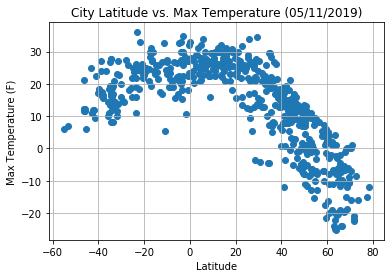

In [39]:
# scatter plot for lat vs max. temp.
plt.scatter(weather_table["Lat"], weather_table["Max Temp"], marker="o")

plt.title("City Latitude vs. Max Temperature " + "(" + date + ")")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

plt.savefig("City Latitude vs. Max Temperature.png")
plt.show()

#### Latitude vs. Humidity Plot

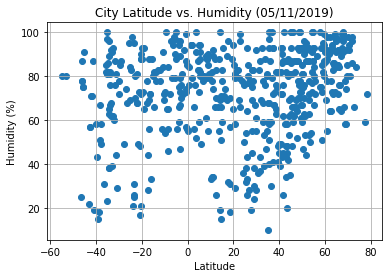

In [40]:
# scatter plot for lat vs humidity
plt.scatter(weather_table["Lat"], weather_table["Humidity"], marker="o")

plt.title("City Latitude vs. Humidity " + "(" + date + ")")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

plt.savefig("City Latitude vs. Humidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

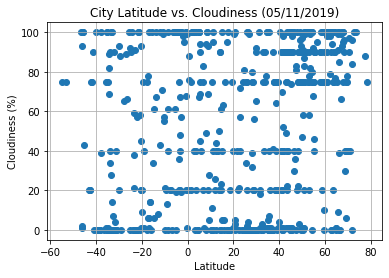

In [41]:
# scatter plot for lat vs cloudiness
plt.scatter(weather_table["Lat"], weather_table["Cloudiness"], marker="o")

plt.title("City Latitude vs. Cloudiness " + "(" + date + ")")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

plt.savefig("City Latitude vs. Cloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

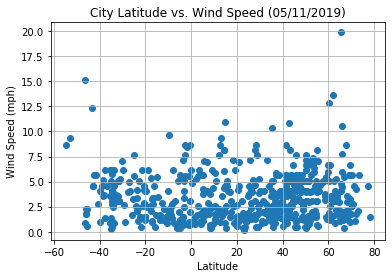

In [42]:
# scatter plot for lat vs wind speed
plt.scatter(weather_table["Lat"], weather_table["Wind Speed"], marker="o")

plt.title("City Latitude vs. Wind Speed " + "(" + date + ")")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

plt.savefig("City Latitude vs. Wind Speed.png")
plt.show()